# Задание

In [1]:


pip install matplotlib

You should consider upgrading via the 'c:\Users\DimasX\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
data = pd.read_csv('../datasets/kaggle_survey_2022_responses.csv', low_memory=False)
name2question = data.iloc[0]
# data.drop(0, inplace=True)
# name2question

## Задание 1

Используя библиотеку matplotlib, построй круговую диаграмму (Pie plot) для возраста респондента.

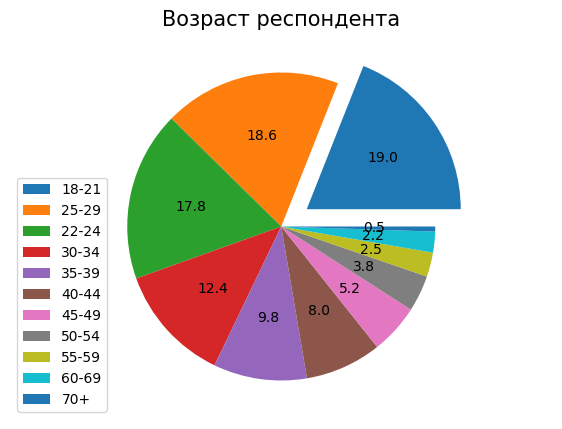

In [5]:
def potter(sizes, labels_in):
    fig1, ax1 = plt.subplots(figsize=(7, 5))
    explode = (0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
    ax1.set_title("Возраст респондента", fontsize=15)
    ax1.axis('equal')
    wedges, texts, autotexts = ax1.pie(sizes, explode = explode, labels=None, autopct='%1.1f', shadow=False, startangle=0)
    ax1.legend(wedges, labels_in,
        title = None,
        loc =("lower left"), #loc =(0.02,0) и можно без bbox
        bbox_to_anchor=(-0, 0), ncol=1)
    plt.show()
arr_age = data['Q2'].loc[1:]
lst = (arr_age.value_counts()).to_dict()
lst_labels = list(lst.keys())
lst_sizes = list(map(int, list(lst.values())))
potter(lst_sizes, lst_labels)

## Задание 2

Используя библиотеку seaborn, построй столбцовую диаграмму (Bar plot) по популярности библиотек для визуализации.

In [8]:
pip install seaborn

     -------------------------------------- 293.3/293.3 KB 2.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\DimasX\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


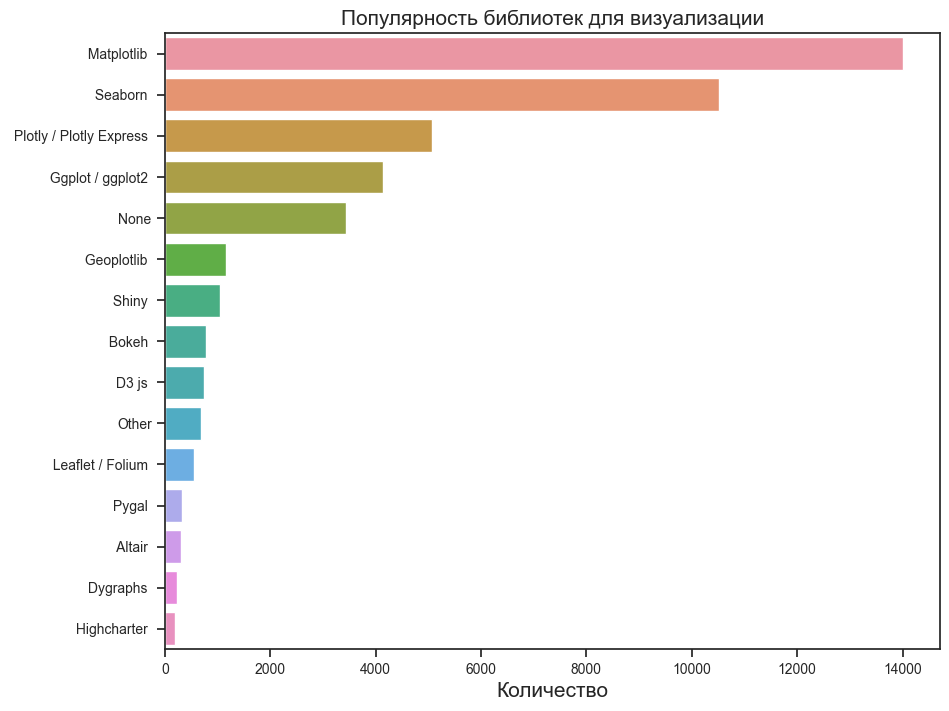

In [5]:
import seaborn as sns
def Plotter_seaborn(names, values):
    sns.set_theme(style="ticks")
    f, ax = plt.subplots(figsize=(10, 8))
    # ax.set(ylim=(0, 7))  ВВозможно выставлять лимиты
    ax.tick_params(axis='x', labelsize=10) # or     # plt.xticks(rotation=45, fontsize=10)
    ax.tick_params(axis='y', labelsize=10) 
    sns.set_color_codes("pastel")
    sns.barplot(y= names, x= values)
    # plt.title('Популярность библиотек для визуализации', fontsize=15)
    ax.set_title("Популярность библиотек для визуализации", loc=('center'), fontsize=15)
    ax.set_xlabel("Количество", fontsize=15)
    # ax.grid(axis='both')
    ax.grid(False)
    # plt.legend()
    plt.show()

q15_columns = [col for col in data.columns if col.startswith('Q15')]
new_table = data[q15_columns].loc[1:].melt().dropna()['value'].value_counts()
dict_lang = new_table.to_dict()
dict_lang = dict(sorted(dict_lang.items(), key=lambda item: item[1], reverse=True)) #Сортирвака словаря
lst_names = list(dict_lang.keys())
lst_val = list(map(int, list(dict_lang.values())))
Plotter_seaborn(lst_names, lst_val)


#https://www.delftstack.com/ru/howto/seaborn/rotate-tick-labels-seaborn/



## Задание 3

Используя библиотеку seaborn, построй диаграмму "Ящик с усами" (Box plot) заработка по различным специальностям.

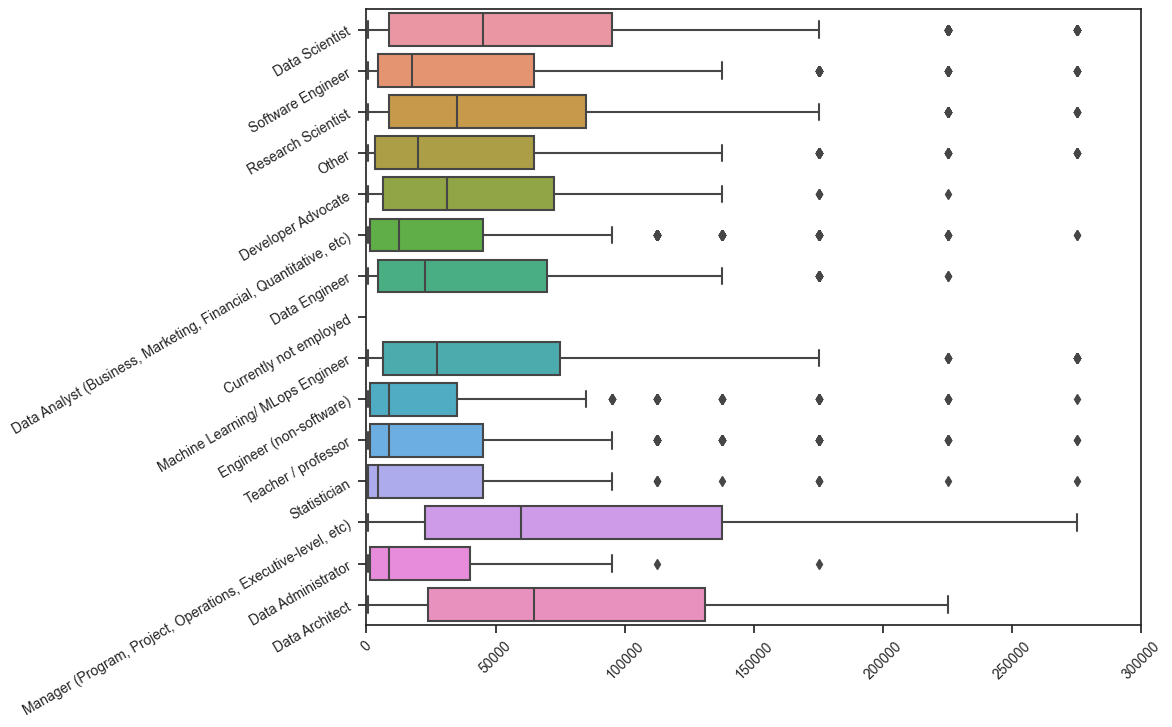

In [6]:

arr_names =  data['Q23'].loc[1:].dropna().unique()
def salary_lst(ds_lst):
    salary = []
    trans_table = str.maketrans({'-': ' ', '>' : '', '<' : '', ',' : '', '$' : ''})
    for token in ds_lst:
        token = token.translate(trans_table)
        token = token.split()
        if (len(token)  == 2):
            salary.append(((int(token[0]) + int(token[1])) / 2))
            # salary.append(int(token[1]))
        else:
            salary.append(int(token[0]))
    return np.array(salary)
#Лист с лситами зарплат по профессиям
big_lst = []
arr_names =  list(data['Q23'].loc[1:].dropna().unique())
for name in arr_names:
    list_salaries = data[data['Q23'] == name]['Q29'].dropna().to_list()
    list_salaries = salary_lst(list_salaries)
    big_lst.append(list_salaries)
# Метод с увеличением графика в sns.boxplot
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=big_lst[0::1], ax=ax, orient='h')
ax.set_yticklabels(arr_names)
ax.tick_params(axis='x', labelsize=10) # or     # plt.xticks(rotation=45, fontsize=10)
ax.tick_params(axis='y', labelsize=10)
garbage= ax.set(xlim=(0, 3e5))
garbage = plt.xticks(rotation=45)
garbage= plt.yticks(rotation=30) # - вывод на экран



## Задание 4
Используя библиотеку plotly, построй столбцовую диаграмму (Bar plot) на распределение респондентов по возрасту по
специальностям Data Administrator, Data Analyst, Data Engineer, Data Scientist, Engineer, MLops Engineer, 
Research Scientist, Software Engineer, Data Architect

In [13]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
def age_of_proff(name_profession):
    # dict_ages = data.loc[1::][['Q2', 'Q23']].dropna().query(f'Q23 == "{name_profession}"')['Q2'].value_counts().to_dict()
    dict_ages = data.loc[1::][['Q2', 'Q23']].dropna().query(f'Q23.str.contains("{name_profession}")')['Q2'].value_counts().to_dict()
    dict_ages = dict(sorted(dict_ages.items(), key=lambda item: item[0], reverse=False))
    return dict_ages
#входные 
name_profession = ['Data Administrator', 'Data Analyst', 'Data Engineer',
            'Data Scientist', 'Engineer', 'MLops Engineer',
            'Research Scientist', 'Software Engineer', 'Data Architect']
# arr_names =  list(data['Q23'].loc[1:].dropna().unique())
dict_ages = age_of_proff(arr_names[5])

#График

# Создание столбчатой диаграммы с использованием данных
fig = make_subplots(rows=3, cols=3,subplot_titles=name_profession)
i = 0
# fig.for_each_xaxis(lambda axis: axis.title.update(font=dict(size=24)))
fig.for_each_trace(lambda title: title.update(font=dict(size=2)))
for name in name_profession:
    dict_ages = age_of_proff(name)
    t = go.Bar(x=list(dict_ages.keys()), y=list(dict_ages.values()), name=name)
    fig.add_trace(t, row=(i//3) + 1 ,col=  (i)%3 + 1)
    # fig.update_traces(name=name, text=dict(size=15, family="Arial", color="black", weight="bold"))
    # fig.update_traces()
    # fig.update_xaxes(title={'text' : name, 'yanchor': 'top',}, row=(i//3) + 1 ,col=  (i)%3 + 1)
    fig.update_traces(selector=dict(type='bar', row=(i//3) + 1 ,col=  (i)%3 + 1), title = name, overwrite= True)
    # fig.update_layout(title=name, title_x=1, title_y=0, title_font_size=20, title_font_color='red', overwrite= True, title_font_family='Arial', title_pad_t=0)

    i += 1

# Установка заголовка и меток осей
fig.update_layout(title='Распределение возрастов по специальностям',height=1000, width=1000)
# fig.update_layout(legend=dict(font=dict(size=12)))

# Отображение диаграммы
fig.show()




C:\Users\DimasX\AppData\Local\Temp\ipykernel_18864\513186511.py:5: UserWarning:

This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.



## Задание 5

In [ ]:
pip install pycountry

Используя библиотеку plotly, построй карту стран респондентов. В этом тебе поможет [plotly.choropleth](https://plotly.com/python/choropleth-maps/)

In [9]:
import country_converter as coco
import plotly.express as px
import plotly.graph_objects as go
d1 = data.loc[1:]
dict_valid = d1['Q4'][(d1['Q4'].str.contains('I do not wish to disclose my location') == False) & (d1['Q4'].str.contains('Other') == False)].value_counts().to_dict()
countries, cnt = list(dict_valid.keys()), list(dict_valid.values())
iso_alpha_2 = coco.convert(names=countries, to='ISO3')
dt = {'Name': countries,
        'Counted': cnt,
        'iso_alpha' : iso_alpha_2,
        }
df = pd.DataFrame(dt)
tmp = go.Choropleth(
    locations=df['iso_alpha'], # Spatial coordinates
    z = df['Counted'].astype(float), # Data to be color-coded
    colorscale = 'Magma',
    zmax=1000, zmin=0,
    colorbar_title = "Количество респондентов",
    colorbar=dict(ticks='outside'),
    # layout= dict(height=600, width=600)
)
# tmp.colorbar.update(ticks='inside') # обновление чего нибудь
fig = go.Figure(data=tmp,)
fig.update_layout(
    autosize=False,
    width=800,
    height=600,)
fig.update_layout(
    title={
        'text': 'Карта мира',
        'y':0.95, # задаем вертикальное положение заголовка
        'x':0.5, # задаем горизонтальное положение заголовка
        'xanchor': 'center', # задаем центрирование заголовка по горизонтали
        'yanchor': 'top', # задаем положение заголовка относительно верхней границы
        'font': {
                'family': 'Arial', # можно настроить шрифт
                'size': 20,
                'color': 'black',
            }
    },
)
fig.show()


In [168]:
d1 = data.loc[1:]
dict_valid = d1['Q4'][(d1['Q4'].str.contains('I do not wish to disclose my location') == False) & (d1['Q4'].str.contains('Other') == False)].value_counts().to_dict()
dict_valid

{'India': 8792,
 'United States of America': 2920,
 'Brazil': 833,
 'Nigeria': 731,
 'Pakistan': 620,
 'Japan': 556,
 'China': 453,
 'Egypt': 383,
 'Mexico': 380,
 'Indonesia': 376,
 'Turkey': 345,
 'Russia': 324,
 'South Korea': 317,
 'France': 262,
 'United Kingdom of Great Britain and Northern Ireland': 258,
 'Spain': 257,
 'Canada': 257,
 'Colombia': 256,
 'Bangladesh': 251,
 'Taiwan': 242,
 'Viet Nam': 212,
 'Argentina': 204,
 'Kenya': 201,
 'Italy': 182,
 'Morocco': 177,
 'Australia': 142,
 'Thailand': 132,
 'Tunisia': 125,
 'Peru': 121,
 'Iran, Islamic Republic of...': 120,
 'Chile': 115,
 'Poland': 113,
 'South Africa': 109,
 'Philippines': 108,
 'Netherlands': 108,
 'Ghana': 107,
 'Israel': 102,
 'Germany': 99,
 'Ethiopia': 98,
 'United Arab Emirates': 94,
 'Portugal': 87,
 'Saudi Arabia': 84,
 'Ukraine': 79,
 'Sri Lanka': 77,
 'Nepal': 75,
 'Malaysia': 74,
 'Cameroon': 68,
 'Singapore': 68,
 'Algeria': 62,
 'Hong Kong (S.A.R.)': 58,
 'Ecuador': 54,
 'Zimbabwe': 54,
 'Ireland'

## Задание 6 - Дополнительное

Одна из самых красивых и динамичных визуализаций - это [Bar Chart Race](https://pypi.org/project/bar-chart-race/). 
Выбери данные, которые интересно было бы визуализировать с помощью этой библиотеки, и поделись с ним со своими одногруппниками.

In [1]:
import plotly.graph_objects as go
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')

fig = go.Figure(data=go.Choropleth(
    locations = df['CODE'],
    z = df['GDP (BILLIONS)'],
    text = df['COUNTRY'],
    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '$',
    colorbar_title = 'GDP<br>Billions US$',
))

fig.update_layout(
    title_text='2014 Global GDP',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text='Source: <a href="https://www.cia.gov/library/publications/the-world-factbook/fields/2195.html">\
            CIA World Factbook</a>',
        showarrow = False
    )]
)

# fig.show()
df['CODE'].unique()
print('Russia' in df['COUNTRY'].unique())
df['GDP (BILLIONS)']

True


0       21.71
1       13.40
2      227.80
3        0.75
4        4.80
        ...  
217      5.08
218      6.64
219     45.45
220     25.61
221     13.74
Name: GDP (BILLIONS), Length: 222, dtype: float64

In [79]:
import pycountry

country_name = "Russian Federation"  # замените на нужное имя страны
try:
    country = pycountry.countries.get(name=country_name)
    iso_map = {
        'alpha_2': country.alpha_2,
        'alpha_3': country.alpha_3,
        'numeric': country.numeric
    }
    print(iso_map)
except AttributeError:
    print(f"ISO код для страны {country_name} не найден")

{'alpha_2': 'RU', 'alpha_3': 'RUS', 'numeric': '643'}
